## Time-Place 기반 클러스터링

In [85]:
# 버전체크
import sys
!{sys.executable} --version

Python 3.6.6 :: Anaconda custom (64-bit)


In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
# 버전체크
import sklearn
print('이 노트북에 사용된 scikit-learn 버전: {}.'.format(sklearn.__version__))

이 노트북에 사용된 scikit-learn 버전: 0.20.0.


## 목차

## 정보를 DB에서 불러오기

In [211]:
# sql 등

## (테스트용) 

In [158]:
# (테스트용) 무작위 2차원 데이터셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=11)
X, y

In [67]:
# chaining
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# 메서드 chaining을 사용하여 fit과 transform을 연달아 호출
X_scaled1=scaler.fit(X).transform(X)
# 위와 동일하지만 더 효율적
X_scaled2=scaler.fit_transform(X)

## 전처리 

In [225]:
# Time과 Place에 넘버링 하기

# place = 
# len(times) == 3*6=18
# len(zpn) == 583
# len(position) == 87

In [48]:
# 인당 모든 소비를 다 불러올 수 없으므로 상위 건만 필터링

# 상권별 이용 비중 순위 세팅

### 탐색적 데이터 분석(EDA)

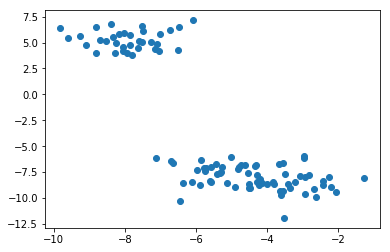

In [161]:
plt.scatter(X[:, 0], X[:, 1]) # numpy array X의 첫번째 열과 두번째 열의 값을 보여줘

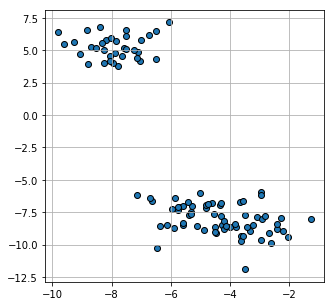

In [162]:
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:, 0], X[:, 1], edgecolors='black')

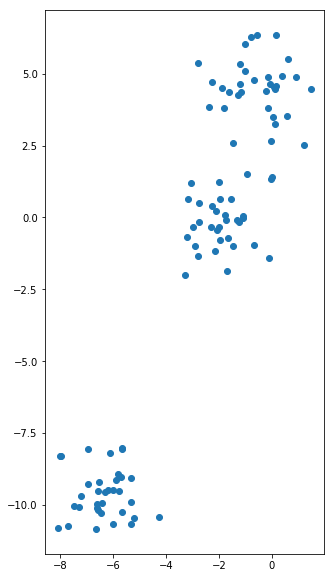

In [47]:
plt.figure(figsize=(5, 10))
plt.scatter(X[:, 0], X[:, 1])

## 척도변환(Feature Scaling)

클러스터링은 데이터의 척도에 민감하므로 원본을 쓰기보다 적절하게 변환을 해야 할 때가 있다. 주로 쓰이는 기법은 Standard 기법과 MinMax 기법이다.

In [70]:
# chaining
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# 메서드 chaining을 사용하여 fit과 transform을 연달아 호출
X_scaled1=scaler.fit(X1).transform(X1)
# 위와 동일하지만 더 효율적
X_scaled2=scaler.fit_transform(X1)

C:\Users\MinjungChoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MinjungChoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MinjungChoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MinjungChoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [69]:
# 평균 0, 분산 1을 갖도록 스케일 조정 # 예시
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X_scaled = scaler.transform(X1)

C:\Users\MinjungChoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MinjungChoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [60]:
# 0~1 사이로 스케일 조정 # 예시
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X1)
X_scaled = scaler.transform(X1)

C:\Users\MinjungChoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [139]:
# 유클리디언 거리가 1이 되도록 조정 # 예시 # Normalizer
from sklearn.preprocessing import Normalizer
scaler = MinMaxScaler()
scaler.fit(X1)
X1_norm = scaler.transform(X1)

# 메서드 chaining을 사용하여 fit과 transform을 연달아 호출
X1_norm=scaler.fit(X1).transform(X1)
# 위와 동일하지만 더 효율적
X1_norm2=scaler.fit_transform(X1)

C:\Users\MinjungChoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MinjungChoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MinjungChoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## 모델링

### (1) k-평균 모델

In [144]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters = k)
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [145]:
print(kmeans.labels_) # print(kmeans.predict(X)) 또한 동일한 결과물 출력

[0 0 1 0 1 1 0 0]


In [146]:
print(kmeans.cluster_centers_)

[[11.         10.2         2.6         5.2        10.         13.6
   6.8        13.4        16.2         8.         12.8         3.6
   7.8         8.         12.         12.8        13.8         5.2       ]
 [ 3.66666667  1.66666667 13.66666667  7.          8.66666667  3.
  11.66666667 11.66666667  6.33333333  4.33333333  9.33333333 11.
   9.33333333 10.66666667  4.33333333 12.         12.          5.        ]]


In [83]:
# 세련되게
df = pd.DataFrame(X)
df['cluster_id'] = kmeans.labels_
df

ValueError: Length of values does not match length of index

Text(0,0.5,'feature 1')

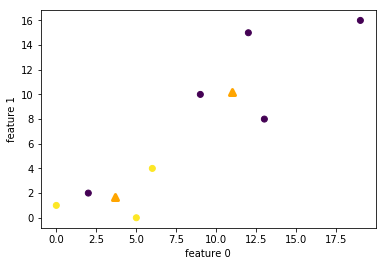

In [147]:
# 클러스터 및 중심 보기 (예시)
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', linewidth=3, c='orange')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

## 결과 확인 및 시각화

In [15]:
X, y = make_blobs(random_state=11)

kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X)
assignments3 = kmeans3.labels_

kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X)
assignments5 = kmeans5.labels_

kmeans7 = KMeans(n_clusters=7)
kmeans7.fit(X)
assignments7 = kmeans7.labels_

print(kmeans3.labels_)
print(kmeans5.labels_)
print(kmeans7.labels_)

[1 0 2 0 1 2 1 2 2 1 0 0 1 0 1 1 1 1 2 1 0 0 0 1 1 0 2 1 2 2 1 0 0 0 1 2 1
 0 2 1 1 1 0 0 0 2 0 0 2 2 2 1 2 2 0 2 2 2 0 0 1 1 2 2 1 0 0 1 2 1 0 1 1 1
 0 2 0 1 2 1 0 1 1 1 0 0 0 2 2 2 2 2 2 0 2 0 1 0 2 2]
[1 2 0 2 1 0 1 0 4 1 2 2 1 2 1 1 1 1 3 1 2 3 2 1 1 2 3 1 4 4 1 3 2 2 1 0 1
 2 0 1 1 1 2 2 2 4 2 2 4 4 4 1 4 0 2 0 4 4 2 2 1 1 4 4 1 2 2 1 4 1 2 1 1 1
 2 4 2 1 0 1 2 1 1 1 2 3 2 0 0 0 3 0 3 2 0 2 1 2 0 0]
[1 3 2 3 5 2 5 4 4 1 3 0 5 0 5 1 5 5 6 1 3 6 3 5 1 3 6 1 4 4 1 6 3 0 1 2 1
 3 2 5 1 1 0 3 0 6 3 3 6 4 4 1 4 4 0 2 4 4 3 3 1 1 4 4 1 3 3 5 4 1 3 1 1 1
 3 4 0 1 4 1 3 1 5 5 3 6 3 2 2 2 6 2 6 3 2 3 5 3 2 4]


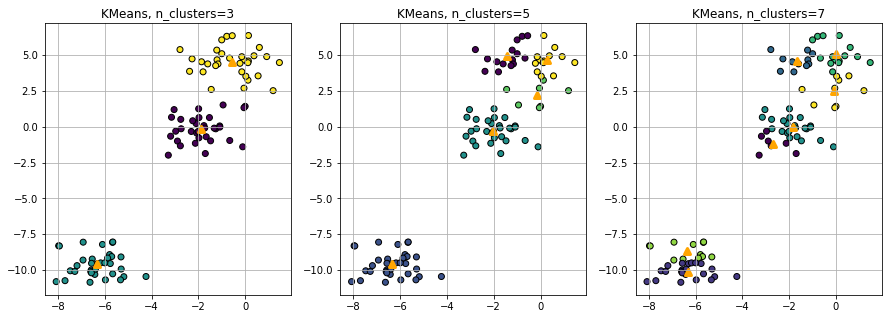

In [19]:
# 방법 1
fig = plt.figure(figsize=(15, 5))

#
ax1 = plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=assignments3, edgecolors='black')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], marker='^', linewidth=3, color='orange')
plt.grid()
plt.title("KMeans, n_clusters=3")

#
ax2 = plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=assignments5, edgecolors='black')
plt.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1], marker='^', linewidth=3, color='orange')
plt.grid()
plt.title("KMeans, n_clusters=5")

#
ax3 = plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=assignments7, edgecolors='black')
plt.scatter(kmeans7.cluster_centers_[:, 0], kmeans7.cluster_centers_[:, 1], marker='^', linewidth=3, color='orange')
plt.grid()
plt.title("KMeans, n_clusters=7")
plt.show()

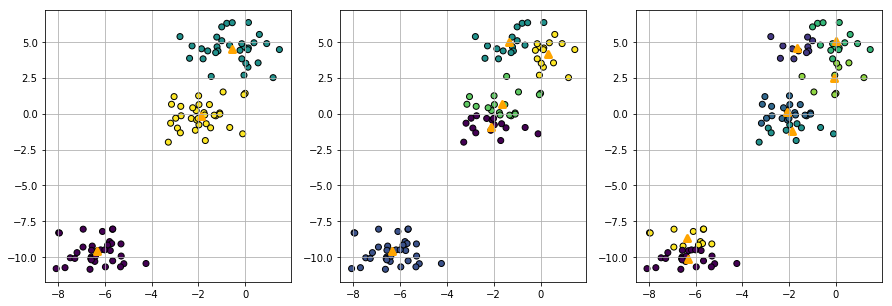

In [89]:
# 방법 2
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# n_clusters=3
ax1.scatter(X[:, 0], X[:, 1], c=assignments3, edgecolors='black')
ax1.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], marker='^', linewidth=3, color='orange') 
ax1.grid(True)

# n_clusters=5
ax2.scatter(X[:, 0], X[:, 1], c=assignments5, edgecolors='black')
ax2.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1], marker='^', linewidth=3, color='orange') 
ax2.grid(True)

# n_clusters=7
ax3.scatter(X[:, 0], X[:, 1], c=assignments7, edgecolors='black')
ax3.scatter(kmeans7.cluster_centers_[:, 0], kmeans7.cluster_centers_[:, 1], marker='^', linewidth=3, color='orange')  
ax3.grid(True)

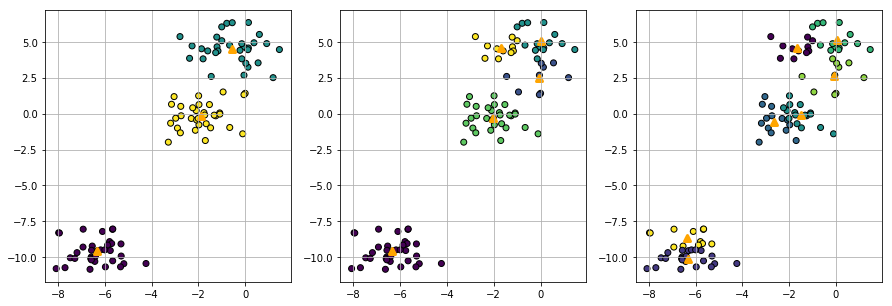

In [90]:
# 방법 3, 변수명 합침
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, edgecolors='black')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', linewidth=3, c='orange')
axes[0].grid()

#
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

axes[1].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, edgecolors='black')
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', linewidth=3, c='orange')
axes[1].grid()

#
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

axes[2].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, edgecolors='black')
axes[2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', linewidth=3, c='orange')

plt.grid()

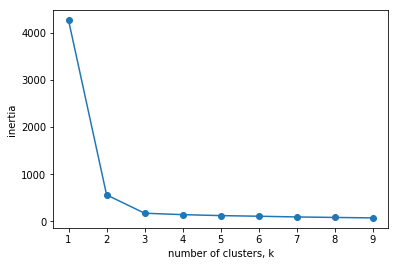

In [108]:
# 적절한 군집 개수(k) 구하기

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

inertia는 데이터 포인트 간의 거리의 합, 즉 클러스터의 응집도를 의미한다.

기울기가 갑자기 떨어지고 나서 평탄해지기 직전인 3개 제일 적절하다고 볼 수 있다.

### (2) 병합군집 모델

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

# plt.scatter(X[:, 0], X[:, 1], c=assignment)
# plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc="best")
# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")

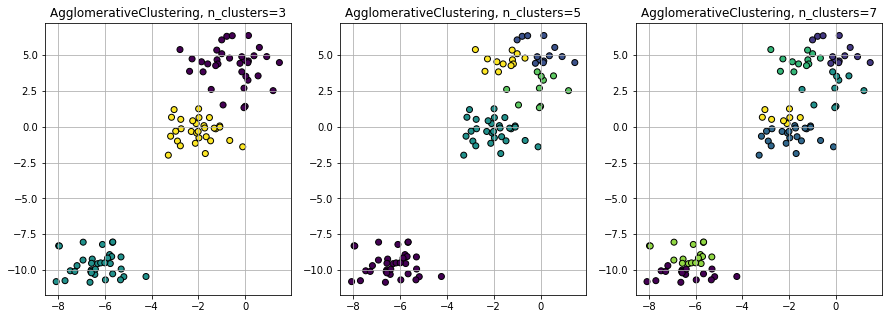

In [13]:
# 방법 1, 변수명 합침
fig = plt.figure(figsize=(15, 5))

#
ax1 = plt.subplot(1, 3, 1)

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)
assignment = agg.labels_

plt.scatter(X[:, 0], X[:, 1], c=assignment, edgecolors='black')
plt.grid()
plt.title("AgglomerativeClustering, n_clusters=3")

#
ax2 = plt.subplot(1, 3, 2)

agg = AgglomerativeClustering(n_clusters=5)
agg.fit(X)
assignment = agg.labels_
plt.scatter(X[:, 0], X[:, 1], c=assignment, edgecolors='black')
plt.grid()
plt.title("AgglomerativeClustering, n_clusters=5")

#
ax2 = plt.subplot(1, 3, 3)

agg = AgglomerativeClustering(n_clusters=7)
agg.fit(X)
assignment = agg.labels_
plt.scatter(X[:, 0], X[:, 1], c=assignment, edgecolors='black')
plt.grid()
plt.title("AgglomerativeClustering, n_clusters=7")
plt.show()

### (3) 밀도기반 모델

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN() # eps=0.3,min_samples=6
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n{}".format(clusters))

클러스터 레이블:
[ 0  1  3 -1  0 -1  0 -1 -1 -1  1 -1 -1 -1  0 -1 -1  0 -1 -1  1 -1 -1  0  0
  1 -1 -1  2 -1 -1 -1  1 -1 -1  3 -1 -1 -1  0 -1  0 -1  1 -1 -1  1  1 -1  2
  2  0 -1 -1  1  3  2  2 -1 -1  0  0 -1  2  0 -1  1 -1  2  0 -1  0 -1 -1  1
 -1 -1 -1 -1 -1  1  0 -1 -1  1 -1  1  3 -1 -1 -1  3 -1 -1 -1  1 -1 -1  3 -1]


In [22]:
print("클러스터 개수:", len(np.unique(clusters)))

클러스터 개수: 5


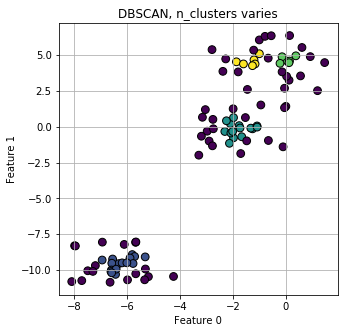

In [24]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=60, edgecolors='black')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.grid()
plt.title("DBSCAN, n_clusters varies")
plt.show()

### 클러스터링 결과물 비교

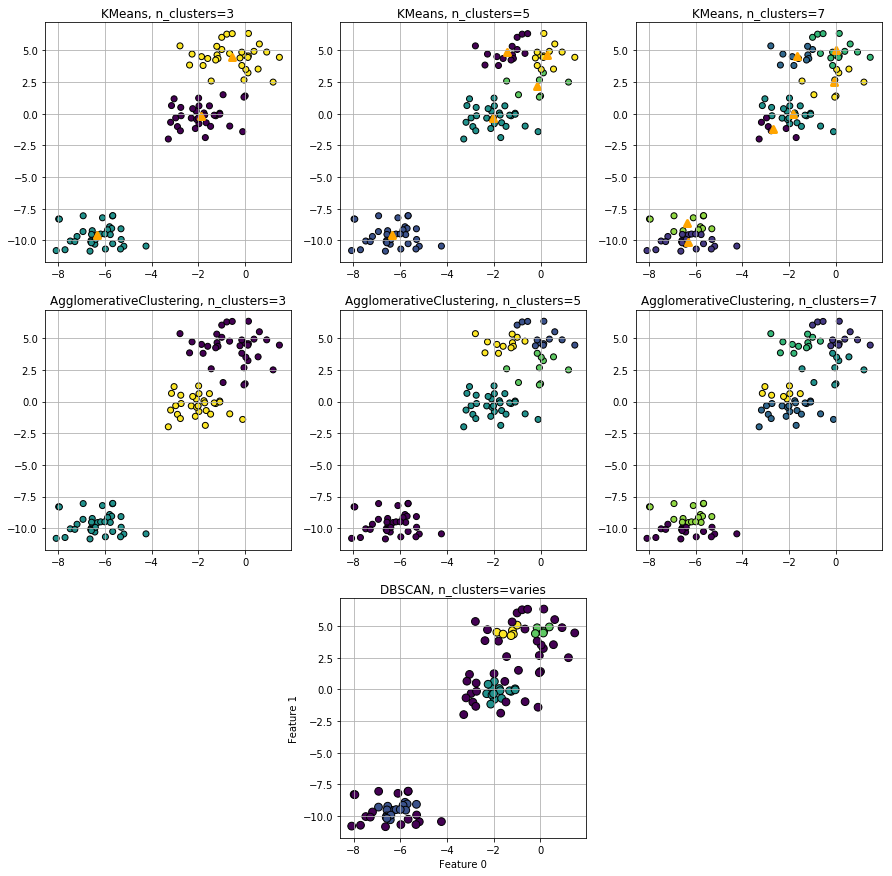

In [26]:
# 방법 1
fig = plt.figure(figsize=(15, 15))

#
plt.subplot(3, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=assignments3, edgecolors='black')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], marker='^', linewidth=3, color='orange')
plt.grid()
plt.title("KMeans, n_clusters=3")

#
plt.subplot(3, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=assignments5, edgecolors='black')
plt.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1], marker='^', linewidth=3, color='orange')
plt.grid()
plt.title("KMeans, n_clusters=5")

#
plt.subplot(3, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=assignments7, edgecolors='black')
plt.scatter(kmeans7.cluster_centers_[:, 0], kmeans7.cluster_centers_[:, 1], marker='^', linewidth=3, color='orange')
plt.grid()
plt.title("KMeans, n_clusters=7")


#
plt.subplot(3, 3, 4)

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)
assignment = agg.labels_

plt.scatter(X[:, 0], X[:, 1], c=assignment, edgecolors='black')
plt.grid()
plt.title("AgglomerativeClustering, n_clusters=3")

#
plt.subplot(3, 3, 5)

agg = AgglomerativeClustering(n_clusters=5)
agg.fit(X)
assignment = agg.labels_

plt.scatter(X[:, 0], X[:, 1], c=assignment, edgecolors='black')
plt.grid()
plt.title("AgglomerativeClustering, n_clusters=5")

#
plt.subplot(3, 3, 6)

agg = AgglomerativeClustering(n_clusters=7)
agg.fit(X)
assignment = agg.labels_
plt.scatter(X[:, 0], X[:, 1], c=assignment, edgecolors='black')
plt.grid()
plt.title("AgglomerativeClustering, n_clusters=7")

#
plt.subplot(3, 3, 8)

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=60, edgecolors='black')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.grid()
plt.title("DBSCAN, n_clusters=varies")
plt.show()

In [12]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [14]:
clustering = AffinityPropagation().fit(X)
clustering

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [15]:
clustering.labels_

array([0, 1, 3, 1, 0, 3, 0, 3, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2,
       1, 0, 0, 1, 2, 0, 3, 3, 0, 2, 1, 1, 0, 3, 0, 1, 3, 0, 0, 0, 1, 1,
       1, 2, 1, 1, 2, 3, 3, 0, 3, 3, 1, 3, 3, 3, 1, 1, 0, 0, 3, 3, 0, 1,
       1, 0, 3, 0, 1, 0, 0, 0, 1, 3, 1, 0, 3, 0, 1, 0, 0, 0, 1, 2, 1, 3,
       3, 3, 2, 3, 2, 1, 3, 1, 0, 1, 3, 3], dtype=int64)

In [16]:
clustering.predict([[0, 0], [4, 4]])

array([1, 2], dtype=int64)

In [17]:
clustering.cluster_centers_

array([[-6.30562859, -9.54682351],
       [-2.00738185, -0.33673318],
       [-0.04831712,  2.675669  ],
       [-0.6638697 ,  4.77028488]])

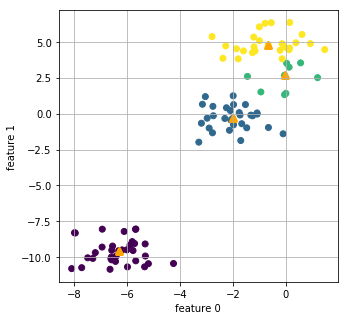

In [32]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], marker='^', linewidth=3, c='orange')
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.grid()